In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from matplotlib.animation import FuncAnimation

In [2]:
data_113 = np.loadtxt('dataset/20151026_113_labeled')
data_114 = np.loadtxt('dataset/20151026_114_labeled')
data = np.concatenate((data_113, data_114), axis=0)
features = data[:, :2]

In [3]:
K = 10
NUM_ITERATIONS = 20

# Record the centers of each iteration
centers_history = np.zeros((NUM_ITERATIONS, K, features.shape[1]))

# Initialize the centers
centers = np.linspace(np.min(features, axis=0), np.max(features, axis=0), K)

for i in range(NUM_ITERATIONS):

    # Compute the distances between each data point and each center
    distances = np.zeros((features.shape[0], K))
    for k in range(K):
        distances[:, k] = np.linalg.norm(features - centers[k], axis=1)

    # Assign each data point to the closest center
    labels = np.argmin(distances, axis=1)

    # Record the centers
    centers_history[i] = centers

    # Update the centers
    for k in range(K):
        centers[k] = np.mean(features[labels == k], axis=0)

In [4]:
# Generate evenly spaced test points in the 2D plane
test_points = np.array([np.array([x, y])
                       for x in range(0, 500, 10)
                       for y in range(0, 500, 10)])

test_labels_history = np.zeros((NUM_ITERATIONS, len(test_points)), dtype=int)

for i in range(NUM_ITERATIONS):
    for j in range(len(test_points)):

        distances = np.zeros(K)
        for k in range(K):
            # Calculate the distance between the test point and the center
            distances[k] = np.linalg.norm(
                test_points[j] - centers_history[i, k])

        # Assign the test point to the closest center
        test_labels_history[i, j] = np.argmin(distances)

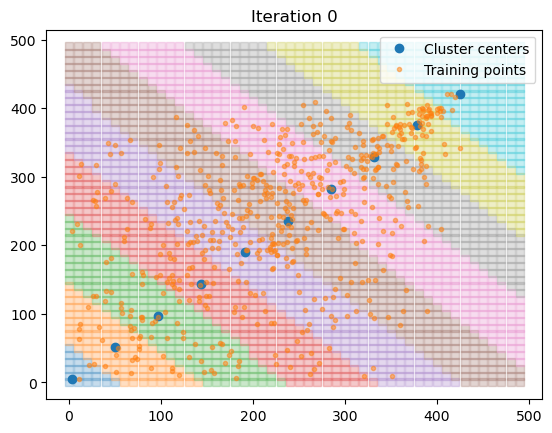

In [14]:
fig, ax = plt.subplots()


def update(i: int):
    ax.cla()

    for k in range(K):
        # Plot the test points
        ax.plot(test_points[test_labels_history[i] == k, 0],
                test_points[test_labels_history[i] == k, 1],
                's', alpha=0.25)

    # Plot the centers
    ax.plot(centers_history[i, :, 0],
            centers_history[i, :, 1],
            'o', label='Cluster centers')

    # Plot the training points
    ax.plot(features[:, 0],
            features[:, 1],
            '.', alpha=0.5, label='Training points')

    ax.set_title(f'Iteration {i}')
    ax.legend()


animation = FuncAnimation(fig, update, frames=NUM_ITERATIONS, interval=100)
HTML(animation.to_jshtml())